## BANKNOTE

In [1]:
data=pd.read_csv('BankNote.csv')
from pyforest import*

<IPython.core.display.Javascript object>

In [2]:
lazy_imports()

['from sklearn.ensemble import GradientBoostingRegressor',
 'import plotly.express as px',
 'import plotly.graph_objs as go',
 'import matplotlib.pyplot as plt',
 'from scipy import signal as sg',
 'from sklearn.linear_model import Ridge',
 'import sys',
 'import fbprophet',
 'import bokeh',
 'from PIL import Image',
 'import imutils',
 'from openpyxl import load_workbook',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import skimage',
 'import torch',
 'import textblob',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import OneHotEncoder',
 'import statistics',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.cluster import KMeans',
 'import seaborn as sns',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import ElasticNetCV',
 'import sklearn',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.linear_model import

In [3]:
df=pd.read_csv('BankNote.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [21]:
x=df.drop('class', axis=1)
y=df['class']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=1)

<IPython.core.display.Javascript object>

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [24]:
x_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [25]:
y_train

1226    1
1085    1
148     0
1178    1
478     0
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: class, Length: 1097, dtype: int64

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [29]:
classifier=LogisticRegression(solver='liblinear',random_state=1)

classifier.fit(x_train,y_train)

accuracies=cross_val_score(estimator=classifier, X=x_train,y=y_train,cv=10)

print('Accuracies: \n', accuracies)

Accuracies: 
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [30]:
print('Mean Accuracy: \n', accuracies.mean()) 

Mean Accuracy: 
 0.9835863219349459


In [34]:
classifier_pred=classifier.predict(x_test)

In [35]:
classifier_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

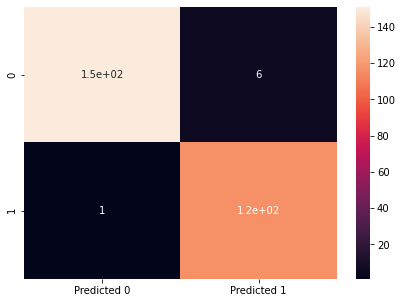

In [40]:
from sklearn import metrics

cm=metrics.confusion_matrix(y_test,classifier_pred, labels=[0,1] )

df_cm=pd.DataFrame(cm, index=[i for i in [0,1 ]], columns=[i for i in ['Predicted 0','Predicted 1' ]] )

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True)

CUSTOM ACTIVATION FUNCTION =>K0+K1X

In [72]:
def custom_activation(x):
    for i in range(len(data)):
        if len(data)*(2/3)<=math.e**i:
            k0=math.e
            k1=(k0**(i-1)*2)
            break
    return (k1*x)+k0

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

model = Sequential()

model.add(Dense(1000, input_dim=4))
model.add(Dense(1000,activation='custom_activation'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3003      
Total params: 1,009,003
Trainable params: 1,009,003
Non-trainable params: 0
_________________________________________________________________


In [69]:
import pandas as pd
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=["accuracy"])
t_history=model.fit(x_train,y_train,batch_size=300,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
4/4 [==============================] - 1s 188ms/step - loss: 4.0436 - accuracy: 0.9531 - val_loss: 3.0186 - val_accuracy: 0.9709
Epoch 2/30
4/4 [==============================] - 0s 43ms/step - loss: 2.0044 - accuracy: 0.9753 - val_loss: 2.5259 - val_accuracy: 0.9745
Epoch 3/30
4/4 [==============================] - 0s 52ms/step - loss: 1.6715 - accuracy: 0.9816 - val_loss: 0.7349 - val_accuracy: 0.9927
Epoch 4/30
4/4 [==============================] - 0s 50ms/step - loss: 0.4061 - accuracy: 0.9867 - val_loss: 1.0718 - val_accuracy: 0.9855
Epoch 5/30
4/4 [==============================] - 0s 52ms/step - loss: 1.1162 - accuracy: 0.9853 - val_loss: 0.6294 - val_accuracy: 0.9927
Epoch 6/30
4/4 [==============================] - 0s 54ms/step - loss: 0.5225 - accuracy: 0.9871 - val_loss: 0.4876 - val_accuracy: 0.9891
Epoch 7/30
4/4 [==============================] - 0s 51ms/step - loss: 0.4736 - accuracy: 0.9873 - val_loss: 0.3673 - val_accuracy: 0.9818
Epoch 8/30
4/4 [==========

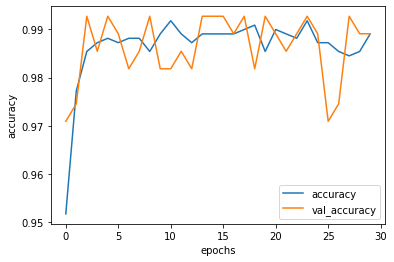

In [70]:
from matplotlib import pyplot as plt
h_data=t_history.history
plt.plot(h_data['accuracy'],label='accuracy')
plt.plot(h_data['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

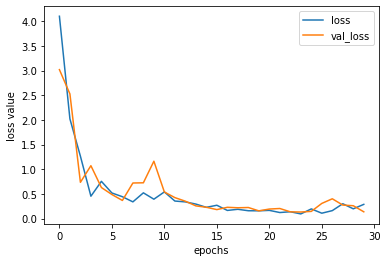

In [71]:
from matplotlib import pyplot as plt
plt.plot(h_data['loss'],label='loss')
plt.plot(h_data['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.legend()